# Scrapping Exercises - Part 2 - 1

Using the selectors from the previous part, we created a spider which get all the information from polytechnique actu page.
We suggest you to run it through this notebook and to have a look to the produced data.

Your next challenge will be to write your own spider.

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
import os
os.chdir("/content/drive/MyDrive/NLP_Capgemini_2021/NLP @ X_HEC - 2K21/Cours 1 - Scrapping")

In [5]:
!pwd
!ls

/content/drive/MyDrive/NLP_Capgemini_2021/NLP @ X_HEC - 2K21/Cours 1 - Scrapping
20210125_DataCamp_Session1.pdf				 __pycache__
bokanTA.py						 requirements.txt
ex_to_do_scrapping_1_1_capgemini.ipynb			 scraping_main.ipynb
ex_to_do_scrapping_1_2_polytechnique.ipynb		 scrapy_project
ex_todo_scrapping_2_2_prepare_Trip_Advisor_spider.ipynb


In [6]:
!pip install -r requirements.txt

     |████████████████████████████████| 245kB 4.9MB/s 
     |████████████████████████████████| 911kB 6.5MB/s 
     |████████████████████████████████| 245kB 13.1MB/s 
     |████████████████████████████████| 3.2MB 13.8MB/s 
     |████████████████████████████████| 61kB 6.2MB/s 
     |████████████████████████████████| 3.1MB 47.4MB/s 
     |████████████████████████████████| 3.2MB 43.0MB/s 
     |████████████████████████████████| 61kB 4.8MB/s 
     |████████████████████████████████| 81kB 9.0MB/s 
  Created wheel for protego: filename=Protego-0.1.16-cp36-none-any.whl size=7766 sha256=bb64ccf6d0e576de608466b21cedacf51732cf6d8900263421549a71098e13f0
  Stored in directory: /root/.cache/pip/wheels/51/01/d1/4a2286a976dccd025ba679acacfe37320540df0f2283ecab12
  Created wheel for PyDispatcher: filename=PyDispatcher-2.0.5-cp36-none-any.whl size=11516 sha256=82a2282f265186d71bbd325544bd14359f5a9a20dccfdab2783c9bc18b1851d2
  Stored in directory: /root/.cache/pip/wheels/88/99/96/cfef6665f9cb1522ee6757ae5

## 1. Making imports 

In [7]:
# Imports
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import logzero
import scrapy

# Set seaborn display
sns.set()

## 2. Running the spider

(The process might take over one minute if you remove the __"-a nb_article_max=100"__ to get all the articles)

In [8]:
# Parameters for spider execution
data_directory_path = 'scrapped_data/'
file_name = 'bokan_ta.jl'
spider_name = 'bokanTA'
file_path_spider = "scrapped_data/"+file_name

os.chdir("scrapy_project/")
!pwd
!ls

/content/drive/My Drive/NLP_Capgemini_2021/NLP @ X_HEC - 2K21/Cours 1 - Scrapping/scrapy_project
bokan.csv  newest_gm_reviews.csv  scrapped_data  scrapy.cfg  TA_scrapy


In [9]:
!scrapy crawl bokanTA -o scrapped_data/bokan_ta.jl

[W 210217 19:09:07 bokanTA:44]  > PARSING NEW REVIEW PAGE (0)
[W 210217 19:09:07 bokanTA:44]  > PARSING NEW REVIEW PAGE (1)
[W 210217 19:09:08 bokanTA:44]  > PARSING NEW REVIEW PAGE (2)
[W 210217 19:09:09 bokanTA:44]  > PARSING NEW REVIEW PAGE (3)
[W 210217 19:09:10 bokanTA:44]  > PARSING NEW REVIEW PAGE (4)
[W 210217 19:09:11 bokanTA:44]  > PARSING NEW REVIEW PAGE (5)
[W 210217 19:09:12 bokanTA:44]  > PARSING NEW REVIEW PAGE (6)
[W 210217 19:09:13 bokanTA:44]  > PARSING NEW REVIEW PAGE (7)
[W 210217 19:09:14 bokanTA:44]  > PARSING NEW REVIEW PAGE (8)
[W 210217 19:09:15 bokanTA:44]  > PARSING NEW REVIEW PAGE (9)
[W 210217 19:09:17 bokanTA:44]  > PARSING NEW REVIEW PAGE (10)
[W 210217 19:09:19 bokanTA:44]  > PARSING NEW REVIEW PAGE (11)
[W 210217 19:09:20 bokanTA:44]  > PARSING NEW REVIEW PAGE (12)
[W 210217 19:09:21 bokanTA:44]  > PARSING NEW REVIEW PAGE (13)
[W 210217 19:09:22 bokanTA:44]  > PARSING NEW REVIEW PAGE (14)
[W 210217 19:09:24 bokanTA:44]  > PARSING NEW REVIEW PAGE (15)
[W

In [10]:
!ls scrapped_data/

bokan_ta.jl  resto_review.jl


## 3. Reading scrapped data

In [72]:
# Function rto read jl file
def read_jl_file(file_name):
    values = []
    with open(file_name, 'rb') as f:
        line = '---'
        while len(line)>1:
            line = f.readline()
            values.append(line)
    values = values[:-1]
    values = [json.loads(i) for i in values]
    df = pd.DataFrame(values)
    return df

In [89]:
# Reading file
pd.set_option("display.max_rows", None, "display.max_columns", None)
df = read_jl_file(data_directory_path+file_name)
df.sort_values(by='resto', inplace=True)
df.drop_duplicates(inplace=True)

# Having a brief look at data
print(df.shape)

print(df['resto'].value_counts())

(572, 6)
Bokan 37 Restaurant          527
BOKAN 38 Bar & 39 Rooftop     45
Name: resto, dtype: int64


In [115]:
import calendar
from datetime import datetime

dates = df['review_date'].str.split()
df1 = df.copy()
months = []
years = []
dictmon = {month: index for index, month in enumerate(calendar.month_name) if month}
for date in dates:
  months.append(dictmon[date[1]])
  years.append(int(date[2]))

df1['month'] = months
df1['year'] = years
df1['day'] = 1
df1['date'] = pd.to_datetime(df1[['year','month','day']])
df1['review_rating'] = df1['review_rating'].astype(int)

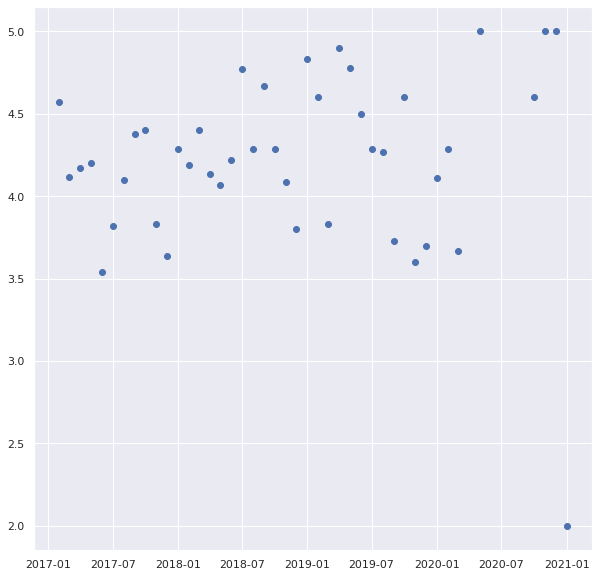

In [120]:
df1 = df1[['date','review_rating']]
df2 = df1.groupby(['date']).mean().reset_index()
plt.figure(figsize=(10,10))
plt.scatter(df2['date'], df2['review_rating'])
plt.show()

In [44]:
df = df.drop(["review_date", "review_title"], axis=1)
df['source'] = "Tripadvisor"

In [45]:
df = df.reset_index().drop('index', axis=1)
df.head()

,resto,review_rating,review_text,review_link,month,year,source
0,BOKAN 38 Bar & 39 Rooftop,2,This place has potential but it has one the mo...,https://www.tripadvisor.co.uk/ShowUserReviews-...,2,2017,Tripadvisor
1,BOKAN 38 Bar & 39 Rooftop,3,Stayed in Novotel. Used Boken bar on 38th floo...,https://www.tripadvisor.co.uk/ShowUserReviews-...,2,2017,Tripadvisor
2,BOKAN 38 Bar & 39 Rooftop,2,We visited the bar in December 2019. Waiting f...,https://www.tripadvisor.co.uk/ShowUserReviews-...,2,2017,Tripadvisor
3,BOKAN 38 Bar & 39 Rooftop,5,Amazing view and even better cocktails. Thanks...,https://www.tripadvisor.co.uk/ShowUserReviews-...,2,2017,Tripadvisor
4,BOKAN 38 Bar & 39 Rooftop,4,"Fantastic views over London, day or night. Sta...",https://www.tripadvisor.co.uk/ShowUserReviews-...,2,2017,Tripadvisor


In [ ]:
df2 = pd.read_csv("newest_gm_reviews.csv")

In [ ]:
df2['resto'] = "Bokan 37 Restaurant"
df2['source'] = "Google"

df2.columns = ["review_text", "review_rating", "review_link", "resto", "source"]
df2 = df2[["resto", "review_rating",	"review_text",	"review_link",	"source"]]

In [ ]:
df = df.append(df2).reset_index().drop("index", axis=1)
df.to_csv("bokan.csv")